In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from collections import Counter
import statistics
from statistics import mode
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
names = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']
df = pd.read_csv('wine.data', names = names)

1. Alcohol <br>
2. Malic acid <br>
3. Ash <br>
4. Alcalinity of ash <br>  
5. Magnesium <br>
6. Total phenols <br>
7. Flavanoids <br>
8. Nonflavanoid phenols <br>
9. Proanthocyanins <br>
10. Color intensity <br>
11. Hue <br>
12. OD280/OD315 of diluted wines <br>
13. Proline <br>    



Number of Instances <br>

class 1: 59 <br>
class 2: 71 <br>
class 3: 48 <br>

In [3]:
df.head()

class  alcohol  malic acid   ash  alcalinity of ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color intensity   hue  OD280/OD315 of diluted wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
df.describe()

class     alcohol  malic acid         ash  alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total phenols  flavanoids  nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       proanthocyanins  color intensity         hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [5]:
print(Counter(i for i in df['class']))

Counter({2: 71, 1: 59, 3: 48})


In [6]:
Y = df['class']
X = df.drop(columns=['class'])

In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_std = pd.DataFrame(scaler.transform(X), columns = names[1:])

mmskaler = preprocessing.MinMaxScaler().fit(X)
X_mm = pd.DataFrame(mmskaler.transform(X), columns = names[1:])

In [8]:
X_std

alcohol  malic acid       ash  alcalinity of ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color intensity       hue  OD280/OD315 of diluted wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

In [9]:
X_mm

alcohol  malic acid       ash  alcalinity of ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     color intensity       hue  OD280/OD315 of diluted wines   proline  
0           0.372014  0.455285                      0.970696  0.561341  
1           0.264505  0.463415                      0.780220  0.550642  
2           0.375427  0.447154                      0.695971  0.646933  
3           0.556314  0.308943                      0.798535  0.857347  
4           0.259386  0.455285                      0.608059  0.325963  
..               ...       ...                           ...       ...  
173         0.547782  0.130081                      0.172161  0.329529  
174         0.513652  0.178862                      0.106227  0.336662  
175         0.761092  0.089431                      0.106227  0.397290  
176         0.684300  0.097561                      0.128205  0.400856  
177         0.675768  0.105691                      0.120879  0.201141  

[178 rows x 13 columns]

In [10]:
n = X.shape[0]
n

178

In [11]:
from sklearn.ensemble import RandomForestClassifier

def applyRandomForestClassifier(X, Y, title=''):

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, Y)
    feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

    sns.barplot(x=feature_scores, y=feature_scores.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

    return feature_scores.index[0], feature_scores.index[1]


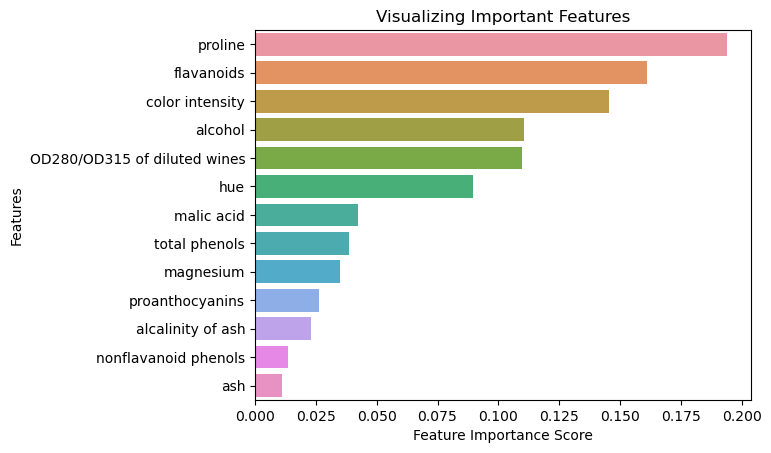

In [12]:
f1, f2 = applyRandomForestClassifier(X, Y)

In [13]:

def entropy(n_clusters, labels):

    #num_clusters / num_classes

    num_classes = 3
    num_clusters = max(n_clusters, num_classes)


    w_c = np.zeros((num_clusters, num_classes))
    n_w = np.zeros((num_clusters))

    min_l = max(min(labels), 0)

    for i in range(len(Y)):
        if labels[i] != -1:
            w_c[labels[i] - 1 * min_l][Y[i] - 1] += 1
            n_w[labels[i] - 1 * min_l] += 1

    H = 0
    for i in range(num_clusters):
        sum = 0
        for j in range(num_classes):
            if w_c[i][j] > 0:
                sum -= (w_c[i][j] / n_w[i]) * math.log((w_c[i][j] / n_w[i]), 2)
        H = sum * (n_w[i] / n)

    return H


def calcMetrics(n_clusters, labels):
    if n_clusters != 3:
        return

    d = {}
    for i in range(len(labels)):
        if labels[i] in d:
            d[labels[i]].append(Y[i])
        else:
            d[labels[i]] = [Y[i]]

    d = dict(sorted(d.items()))

    for k, v in d.items():
        d[k] = mode(v)

    new_labels = np.array([d[x] for x in labels])

    print('n_clusters:', n_clusters)
    #print('entropy old labels:', entropy(n_clusters, labels))
    print('entropy new labels:', entropy(n_clusters, new_labels))
    print('accuracy:', accuracy_score(Y, new_labels))
    print('---------------------------')




In [14]:
def plotClusters(X, labels, title='', isCompare = True):

    if isCompare:

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        ax1.scatter(X[[f1]], X[[f2]], c=labels)
        ax2.scatter(X[[f1]], X[[f2]], c=Y)
        ax1.set_title(title)
        ax2.set_title('Real classes')


    else:

        plt.figure(figsize=(8, 5))
        plt.scatter(X[[f1]], X[[f2]], c=labels)
        plt.title(title)


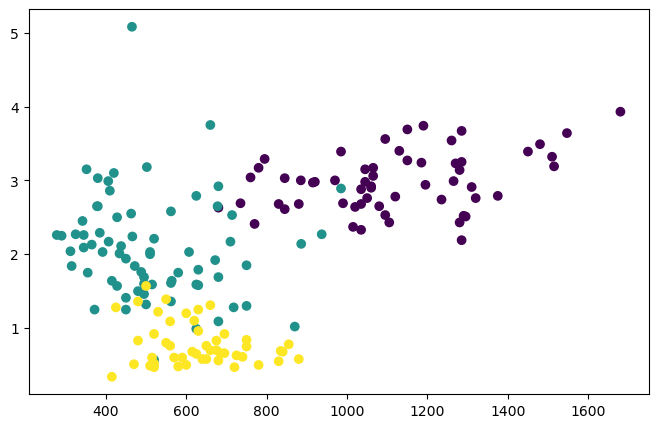

In [15]:
plotClusters(X, Y, isCompare = False)

# KMeans

In [16]:
from sklearn.cluster import KMeans

In [17]:
info = []

In [18]:
def applyKMeans(X, n_clusters, init, isPrint = False, isPlot = False):

    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init='auto').fit(X)

    info.append([n_clusters, init, Counter(i for i in kmeans.labels_)])

    if isPlot:
        title = 'Number of clusters: ' + str(n_clusters)
        plotClusters(X, kmeans.labels_, title)
        calcMetrics(n_clusters, kmeans.labels_)

    if isPrint:
        #print('labels:', kmeans.labels_)
        print('cluster centers:')
        print(kmeans.cluster_centers_)
        print(Counter(i for i in kmeans.labels_))

In [ ]:
#pd.set_option('display.max_colwidth', None)

n_clusters: 3
entropy new labels: 0.5265980008522766
accuracy: 0.702247191011236
---------------------------


n_clusters       init                             clusters
0           2     random                      {0: 55, 1: 123}
1           2  k-means++                      {1: 56, 0: 122}
2           3     random                {0: 47, 1: 62, 2: 69}
3           3  k-means++                {1: 47, 0: 62, 2: 69}
4           4     random         {0: 32, 3: 23, 1: 57, 2: 66}
5           4  k-means++         {2: 30, 0: 20, 1: 60, 3: 68}
6           5     random  {4: 27, 1: 20, 0: 26, 2: 48, 3: 57}
7           5  k-means++  {0: 30, 2: 20, 3: 43, 1: 49, 4: 36}

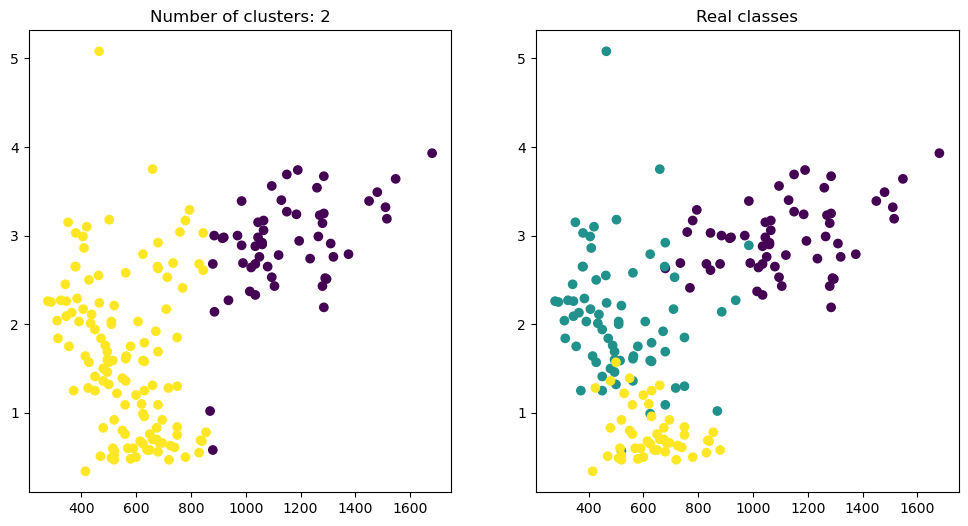

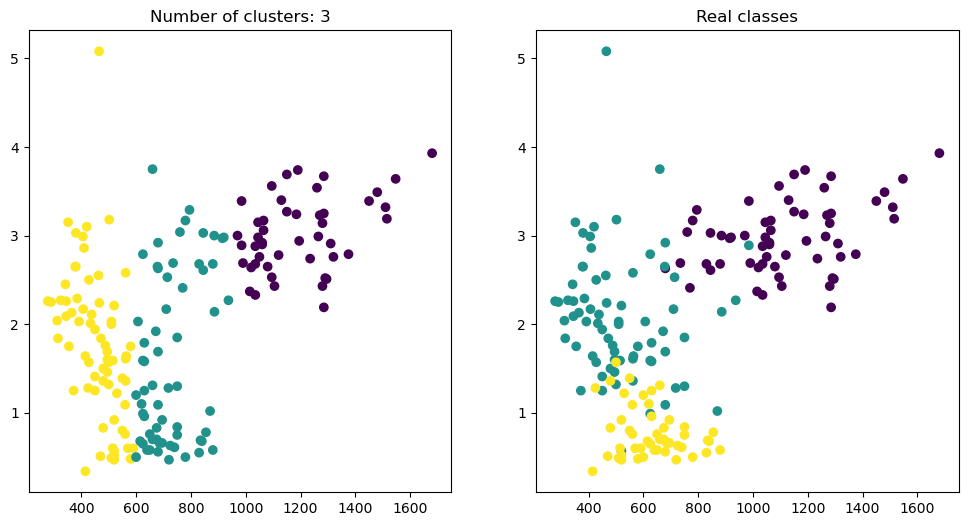

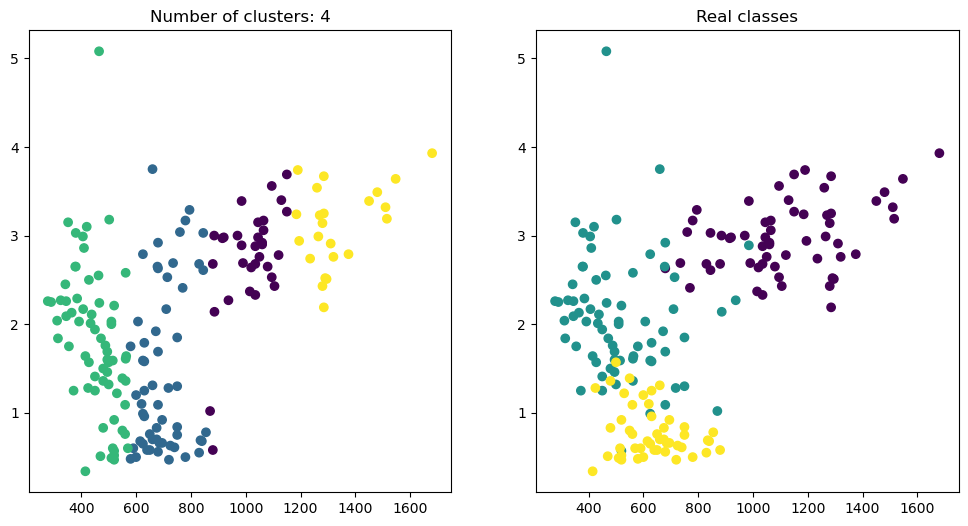

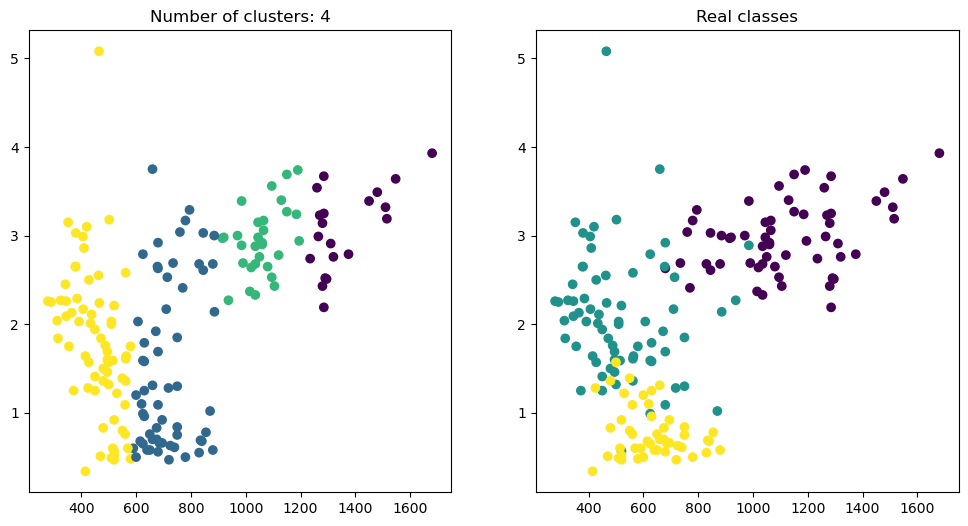

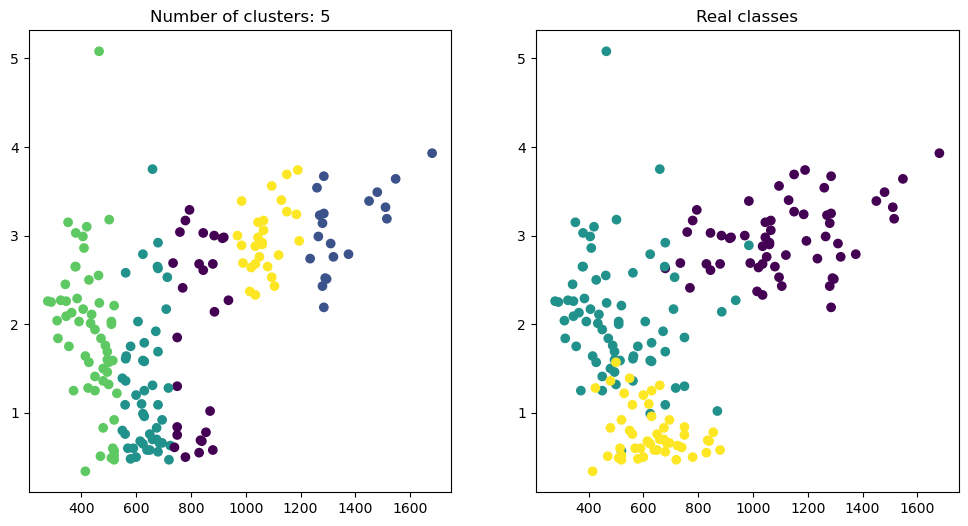

In [19]:
info = []

applyKMeans(X, 2, 'random', isPlot = True)
applyKMeans(X, 2, 'k-means++')
applyKMeans(X, 3, 'random', isPlot = True)
applyKMeans(X, 3, 'k-means++')
applyKMeans(X, 4, 'random', isPlot = True)
applyKMeans(X, 4, 'k-means++', isPlot = True)
applyKMeans(X, 5, 'random', isPlot = True)
applyKMeans(X, 5, 'k-means++')


data = pd.DataFrame(info, columns=['n_clusters', 'init', 'clusters'])
info = []
data

n_clusters: 3
entropy new labels: 0.09247530844813097
accuracy: 0.9662921348314607
---------------------------
n_clusters: 3
entropy new labels: 0.09247530844813097
accuracy: 0.9606741573033708
---------------------------


n_clusters     n_init                      clusters
0           2     random                {0: 87, 1: 91}
1           2  k-means++               {0: 113, 1: 65}
2           3     random         {1: 62, 2: 65, 0: 51}
3           3  k-means++         {1: 63, 2: 64, 0: 51}
4           4     random  {1: 54, 3: 31, 0: 44, 2: 49}
5           4  k-means++  {3: 48, 2: 21, 1: 58, 0: 51}

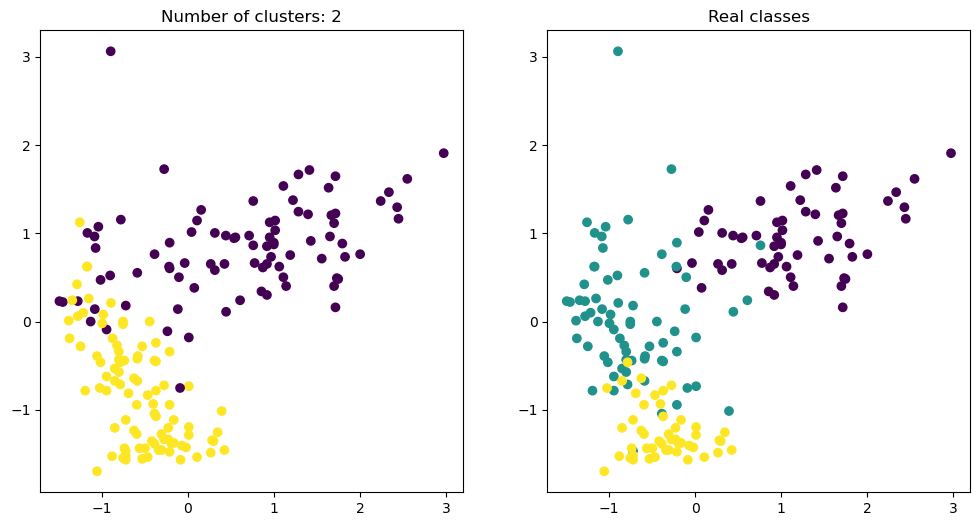

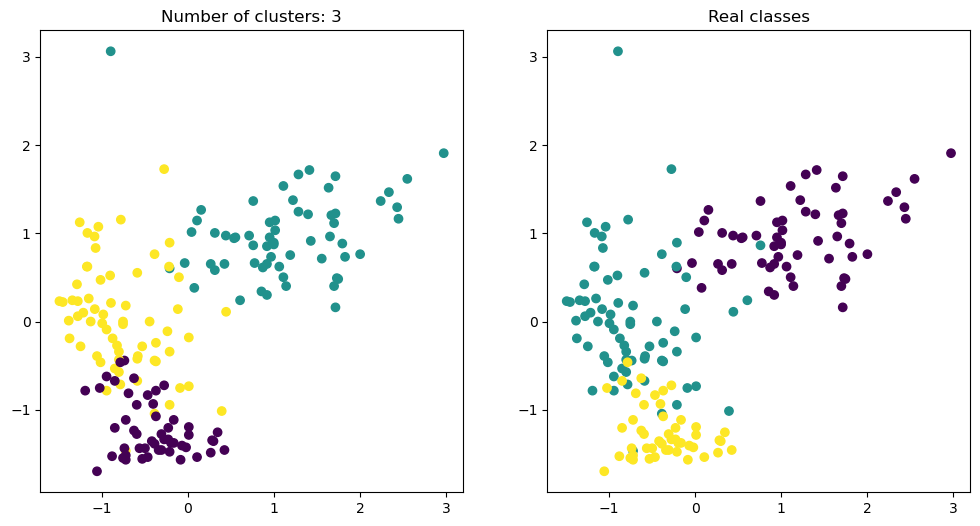

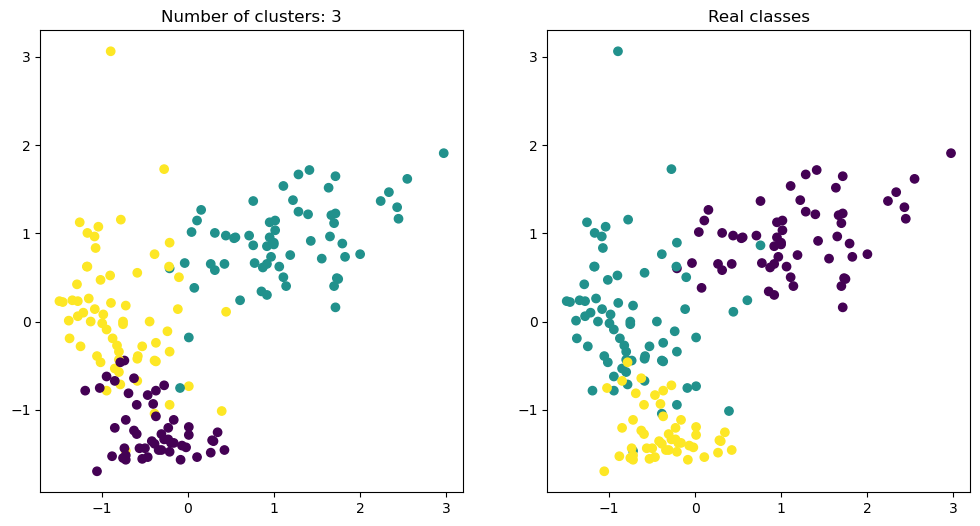

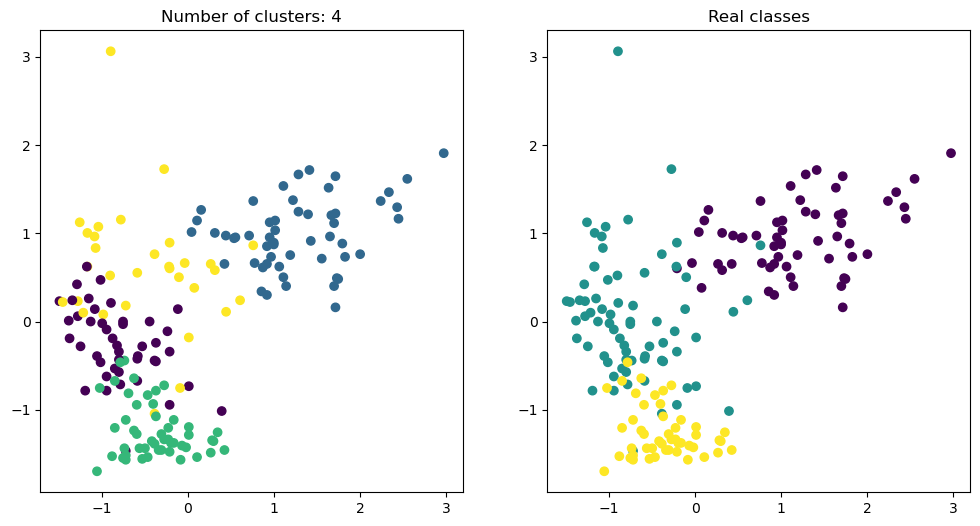

In [20]:
info = []

applyKMeans(X_std, 2, 'random', isPlot = True)
applyKMeans(X_std, 2, 'k-means++')
applyKMeans(X_std, 3, 'random', isPlot = True)
applyKMeans(X_std, 3, 'k-means++', isPlot = True)
applyKMeans(X_std, 4, 'random', isPlot = True)
applyKMeans(X_std, 4, 'k-means++')
#applyKMeans(X_std, 5, 'random', isPlot = True)
#applyKMeans(X_std, 5, 'k-means++')


data = pd.DataFrame(info, columns=['n_clusters', 'n_init', 'clusters'])
info = []
data

n_clusters: 3
entropy new labels: 0.15267387684204983
accuracy: 0.9550561797752809
---------------------------
n_clusters: 3
entropy new labels: 0.09247530844813097
accuracy: 0.9606741573033708
---------------------------


n_clusters     n_init                      clusters
0           2     random               {1: 108, 0: 70}
1           2  k-means++               {0: 108, 1: 70}
2           3     random         {1: 61, 2: 63, 0: 54}
3           3  k-means++         {1: 63, 2: 64, 0: 51}
4           4     random  {2: 55, 0: 29, 1: 44, 3: 50}
5           4  k-means++  {0: 65, 2: 60, 3: 40, 1: 13}

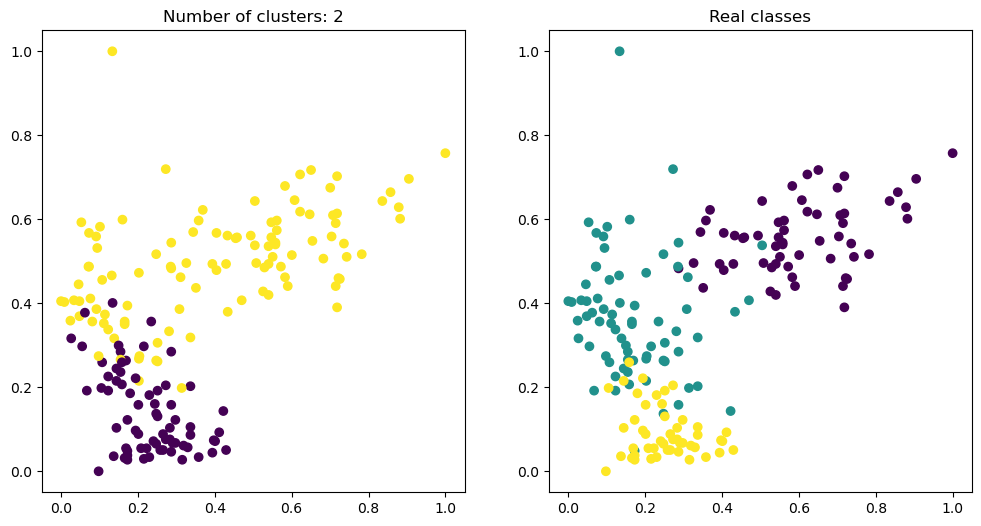

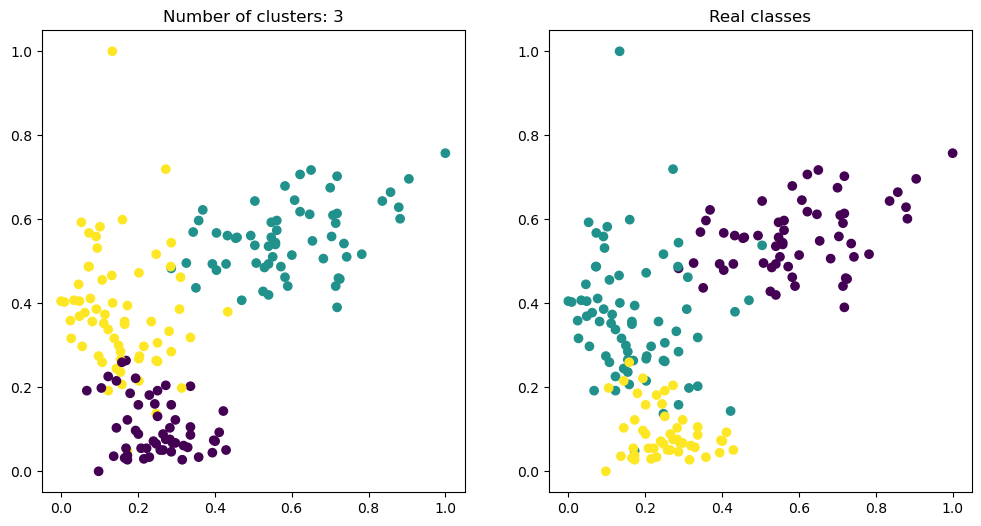

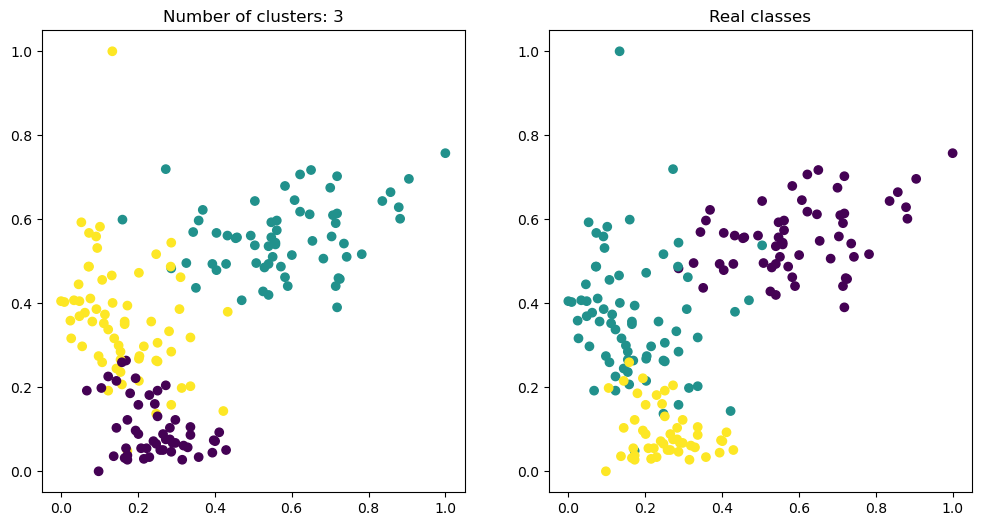

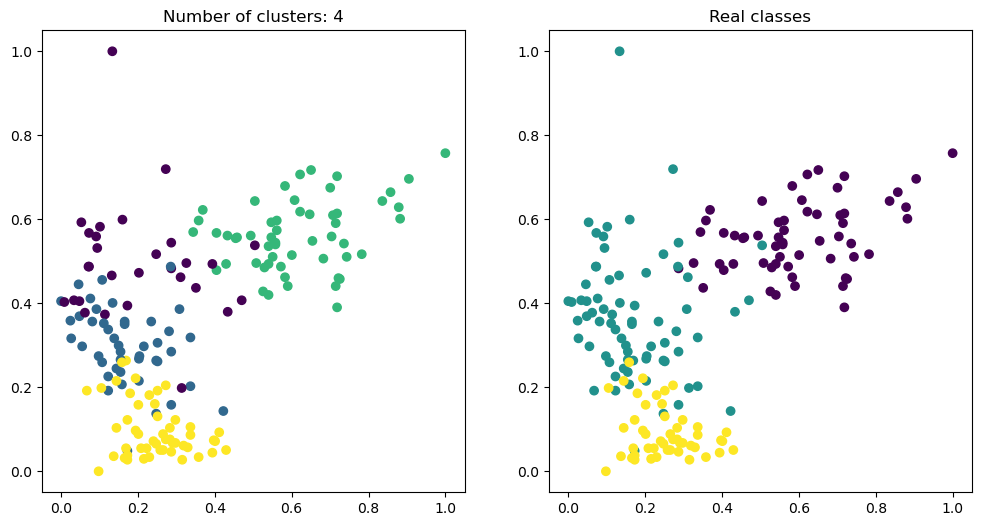

In [22]:
info = []

applyKMeans(X_mm, 2, 'random', isPlot = True)
applyKMeans(X_mm, 2, 'k-means++')
applyKMeans(X_mm, 3, 'random', isPlot = True)
applyKMeans(X_mm, 3, 'k-means++', isPlot = True)
applyKMeans(X_mm, 4, 'random', isPlot = True)
applyKMeans(X_mm, 4, 'k-means++')
#applyKMeans(X_std, 5, 'random', isPlot = True)
#applyKMeans(X_std, 5, 'k-means++')


data = pd.DataFrame(info, columns=['n_clusters', 'n_init', 'clusters'])
info = []
data

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
info = []

In [25]:
def applyDBSCAN(X, eps, min_samples, isPrint=False, isPlot=True):

    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    clusters = Counter(i for i in dbscan.labels_)

    core_ids = dbscan.core_sample_indices_
    outliers_ids = [i for i in range(len(dbscan.labels_)) if dbscan.labels_[i] == -1]
    n_noise_ = len(outliers_ids)

    info.append([eps, min_samples, n_clusters_, n_noise_, clusters, len(core_ids)])

    if isPlot:
        title = 'Number of clusters: ' + str(n_clusters_) + '; eps: ' + str(eps) + '; min_samples: ' + str(min_samples) + '; n_noise: ' + str(n_noise_)
        plotClusters(X, dbscan.labels_, title)
        calcMetrics(n_clusters_, dbscan.labels_)

    if isPrint:
        print('labels:', dbscan.labels_)
        print('Number of clusters:', n_clusters_)
        print('Number of noise points:', n_noise_)
        print('Clasters:', clusters)
        print('Core indexes:', core_ids)
        print('-----------------------------------')


    df_core = X[X.index.isin(core_ids)]
    df_outlier = X[X.index.isin(outliers_ids)]
    return df_core, df_outlier

n_clusters: 3
entropy new labels: 0.0
accuracy: 0.6460674157303371
---------------------------


eps  min_samples  n_clusters_  n_noise_  \
0    1            2            0       178   
1   20            2           16        12   
2   20            4            6        36   
3   30            2            7         8   
4   30            3            5        12   
5   30            5            4        20   
6   35            3            6         4   
7   40            3            4         3   
8   40            4            4         3   
9   40            5            3         8   

                                            clusters  core samples  
0                                          {-1: 178}             0  
1  {0: 16, 1: 3, -1: 12, 2: 52, 3: 11, 4: 2, 5: 2...           166  
2  {0: 16, -1: 36, 3: 51, 1: 11, 2: 12, 4: 43, 5: 9}           124  
3  {0: 22, 1: 3, -1: 8, 2: 115, 3: 12, 4: 2, 5: 2...           170  
4        {0: 22, 1: 3, -1: 12, 2: 115, 3: 12, 4: 14}           160  
5              {0: 19, -1: 20, 1: 114, 2: 12, 3: 13}           145  
6   {0: 24, 1: 3, 2: 5, 3: 115, 4: 13, -1: 4, 5: 14}           170  
7                {0: 27, 1: 5, 2: 130, 3: 13, -1: 3}           173  
8                {0: 27, 1: 5, 2: 130, 3: 13, -1: 3}           168  
9                      {0: 27, -1: 8, 1: 130, 2: 13}           161

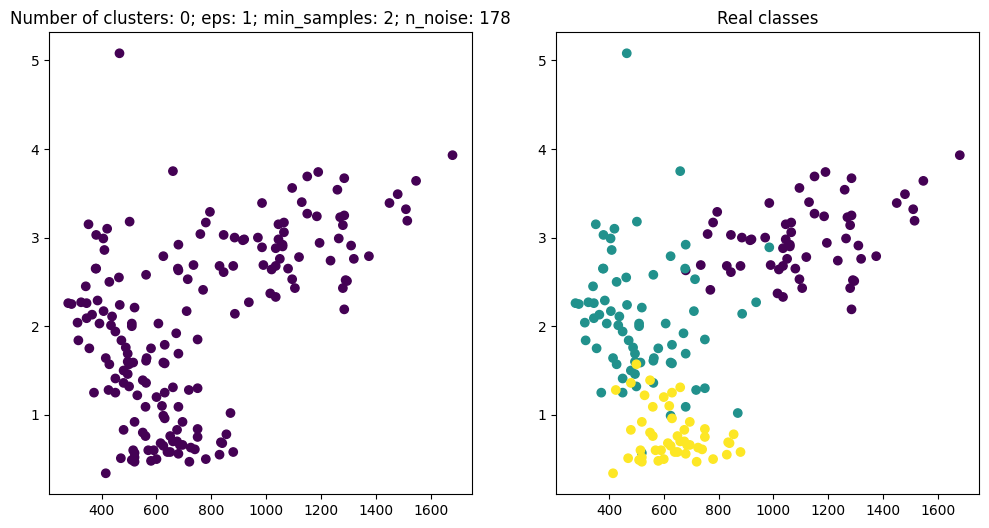

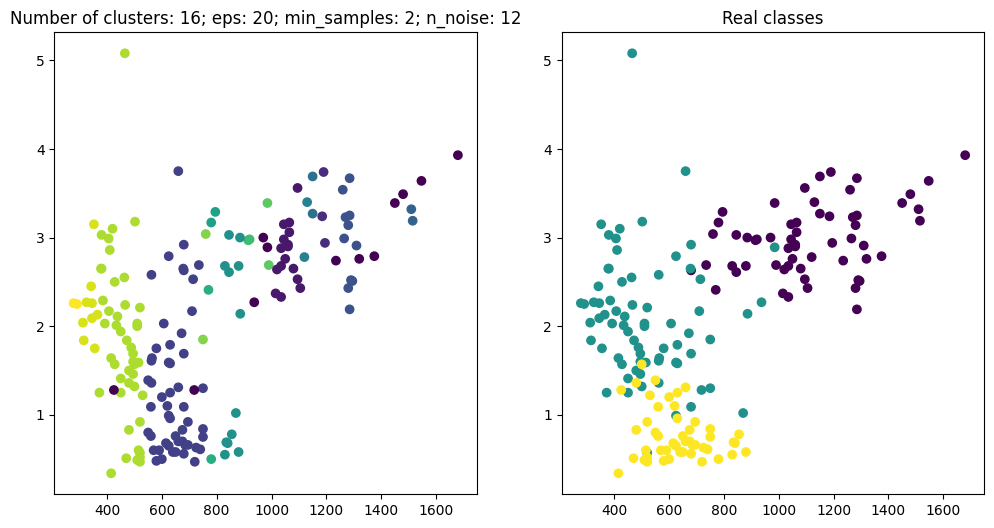

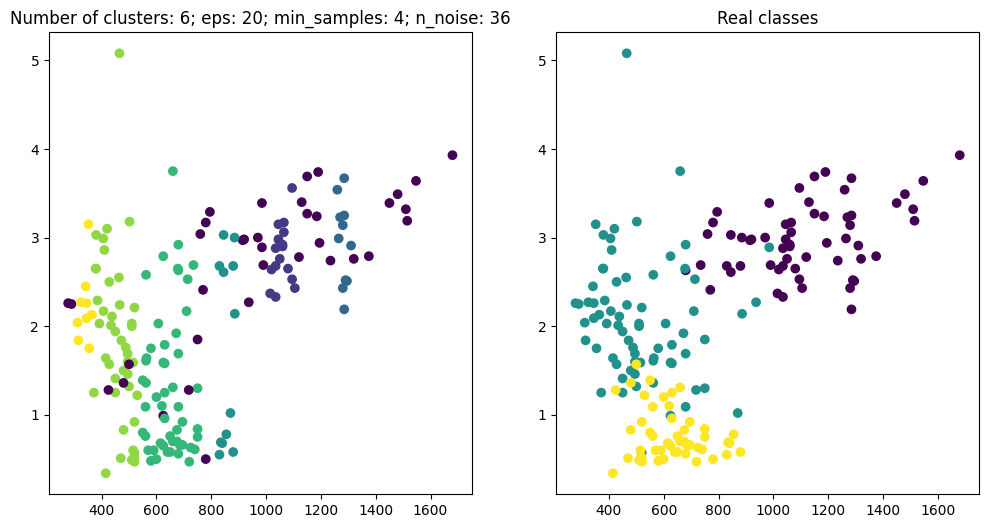

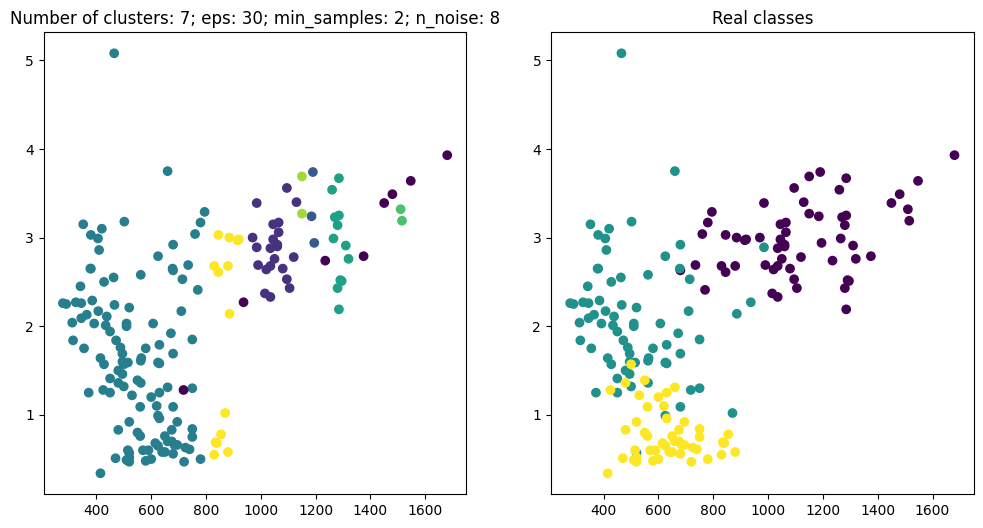

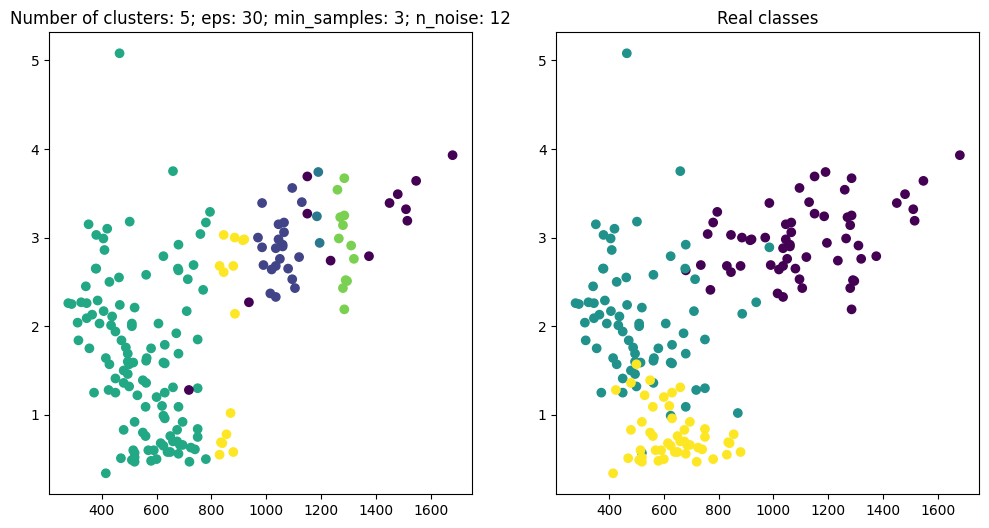

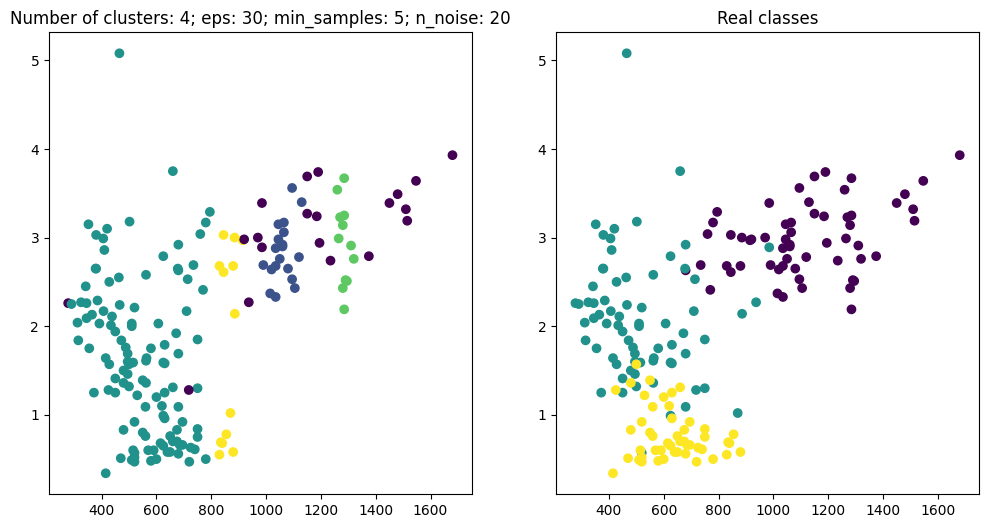

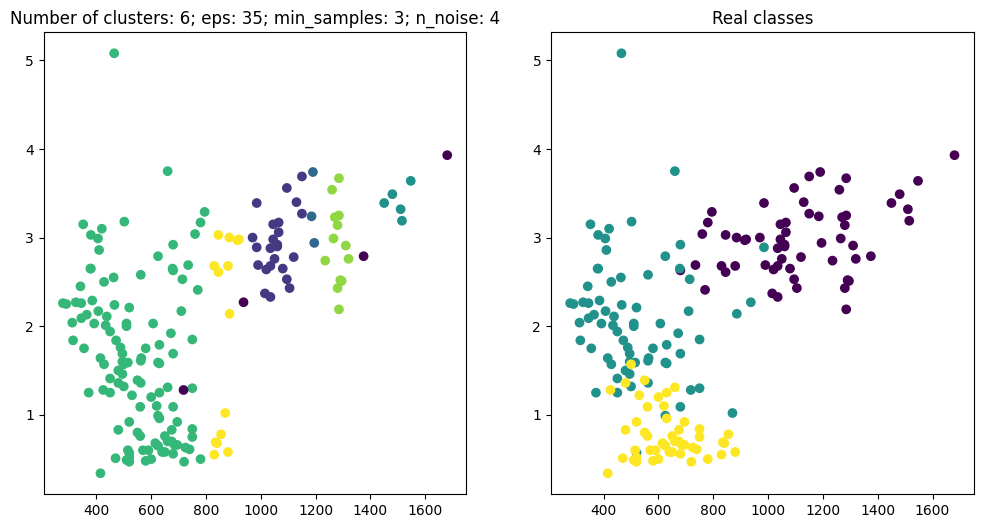

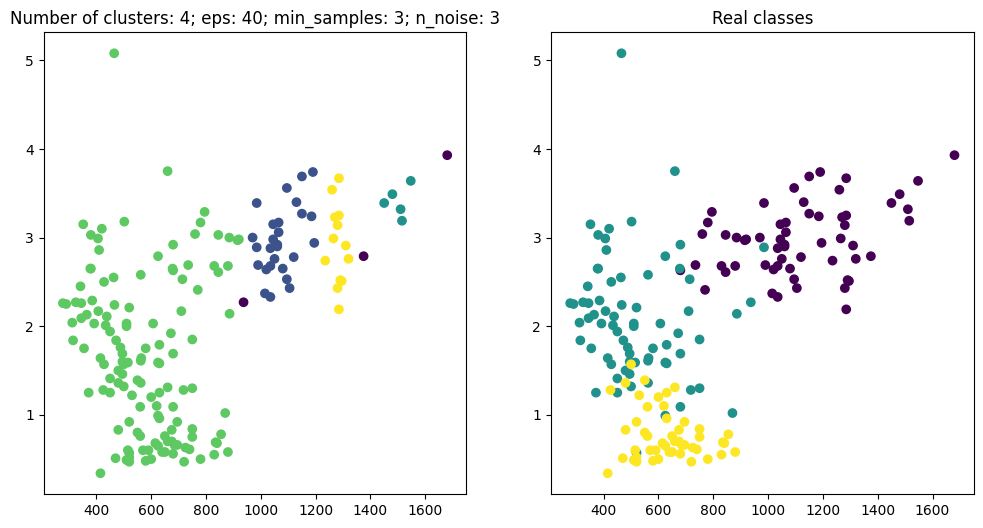

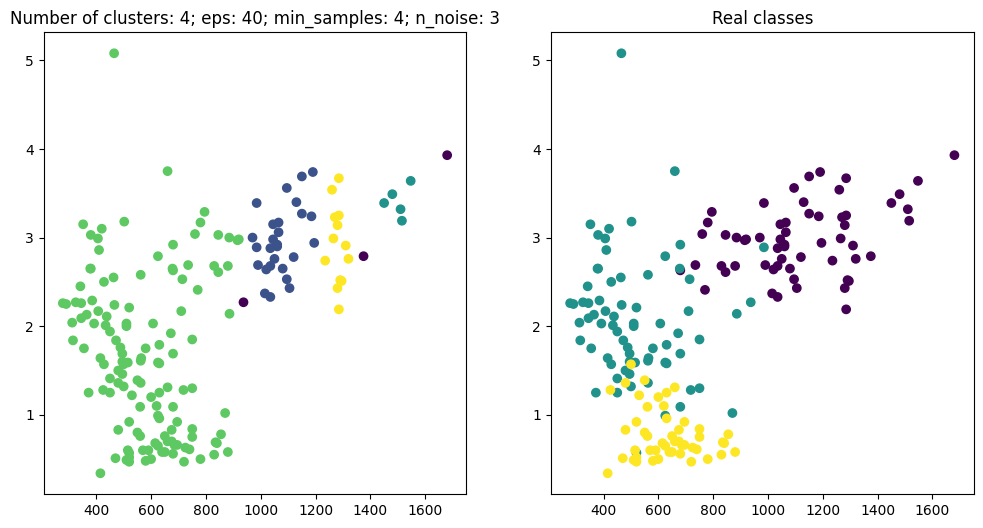

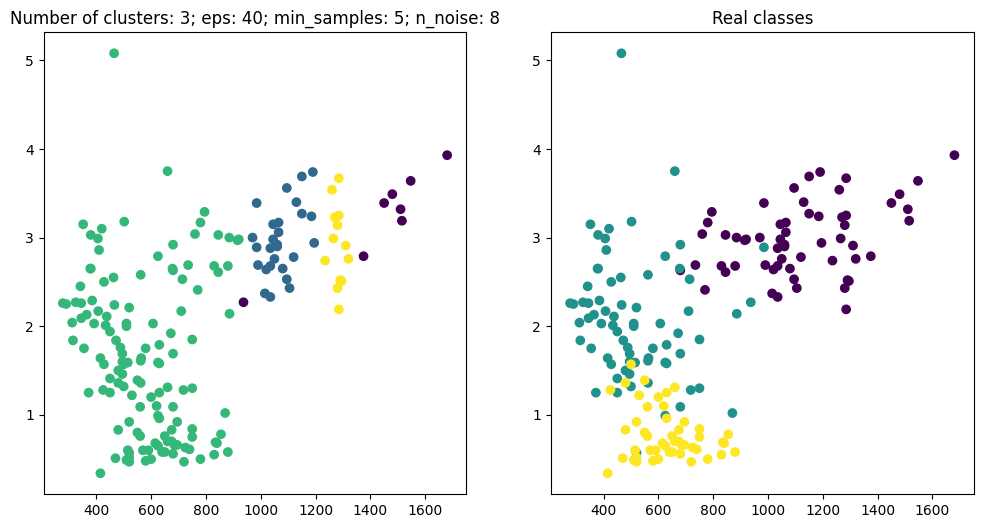

In [ ]:
info = []


applyDBSCAN(X, eps=1, min_samples=2)
applyDBSCAN(X, eps=20, min_samples=2)
applyDBSCAN(X, eps=20, min_samples=4)
applyDBSCAN(X, eps=30, min_samples=2)
applyDBSCAN(X, eps=30, min_samples=3)
applyDBSCAN(X, eps=30, min_samples=5)
applyDBSCAN(X, eps=35, min_samples=3)
applyDBSCAN(X, eps=40, min_samples=3)
applyDBSCAN(X, eps=40, min_samples=4)
applyDBSCAN(X, eps=40, min_samples=5)


data = pd.DataFrame(info, columns=['eps', 'min_samples', 'n_clusters_', 'n_noise_', 'clusters', 'core samples'])
info = []
data

n_clusters: 3
entropy new labels: 0.0
accuracy: 0.449438202247191
---------------------------
n_clusters: 3
entropy new labels: 0.0
accuracy: 0.4101123595505618
---------------------------


eps  min_samples  n_clusters_  n_noise_  \
0  1.2            2            2       174   
1  1.9            3            9        75   
2  2.5            2            3        19   
3  2.8            3            1        15   
4  3.0            2            3         5   
5  3.5            3            2         3   

                                            clusters  core samples  
0                              {-1: 174, 0: 2, 1: 2}             4  
1  {0: 43, -1: 75, 1: 11, 2: 9, 3: 7, 4: 6, 5: 4,...            84  
2                       {0: 155, -1: 19, 1: 2, 2: 2}           159  
3                                   {0: 163, -1: 15}           158  
4                        {0: 168, -1: 5, 1: 3, 2: 2}           173  
5                              {0: 172, -1: 3, 1: 3}           172

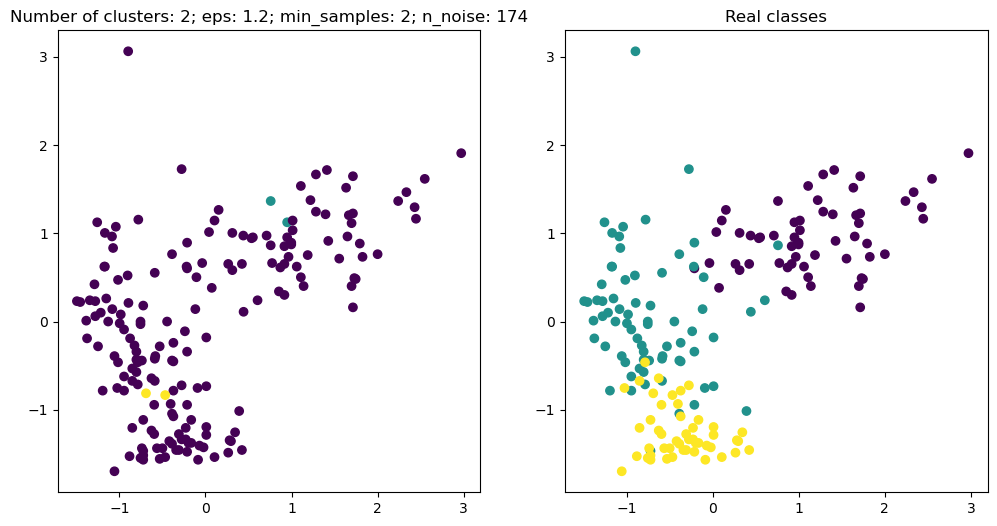

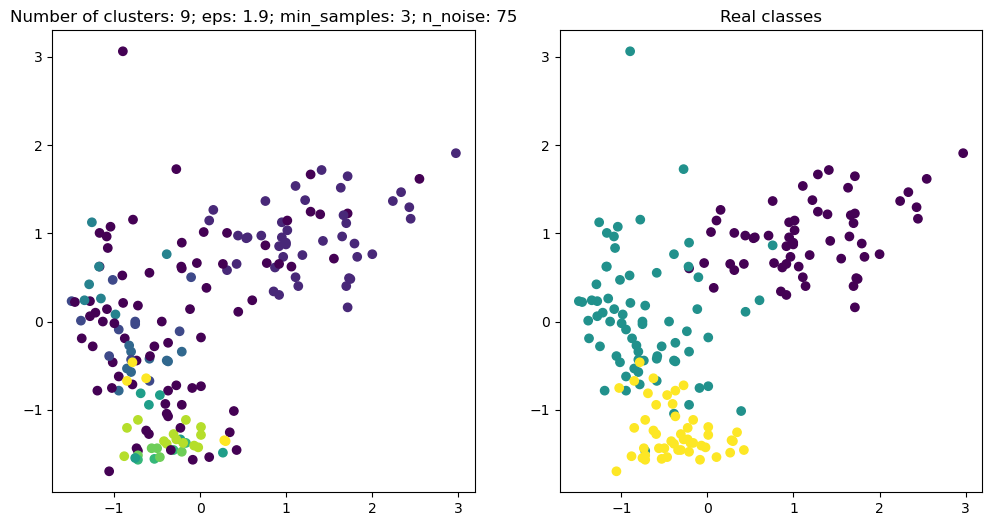

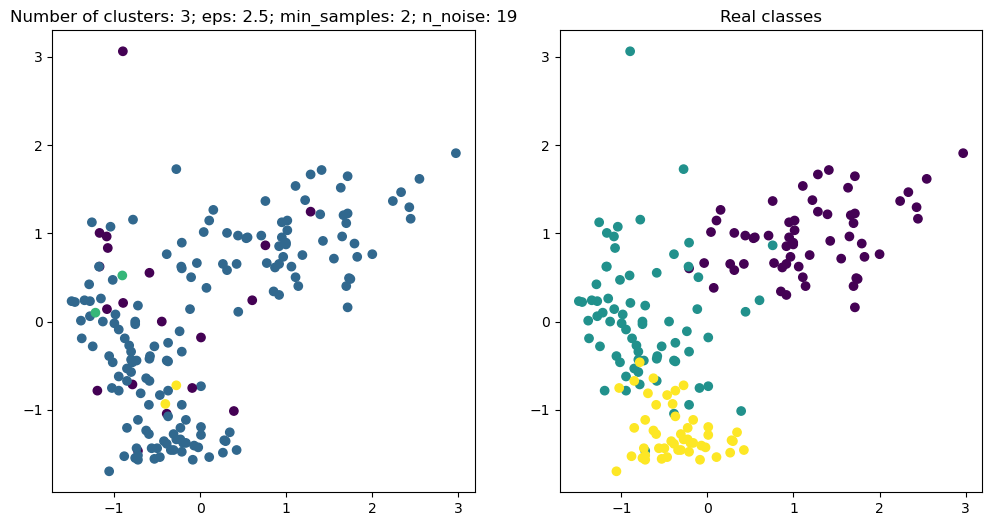

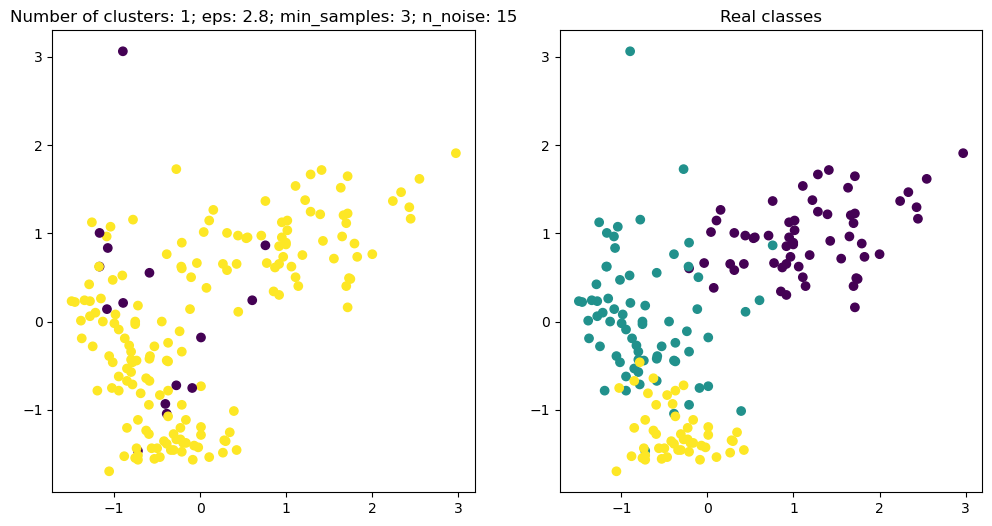

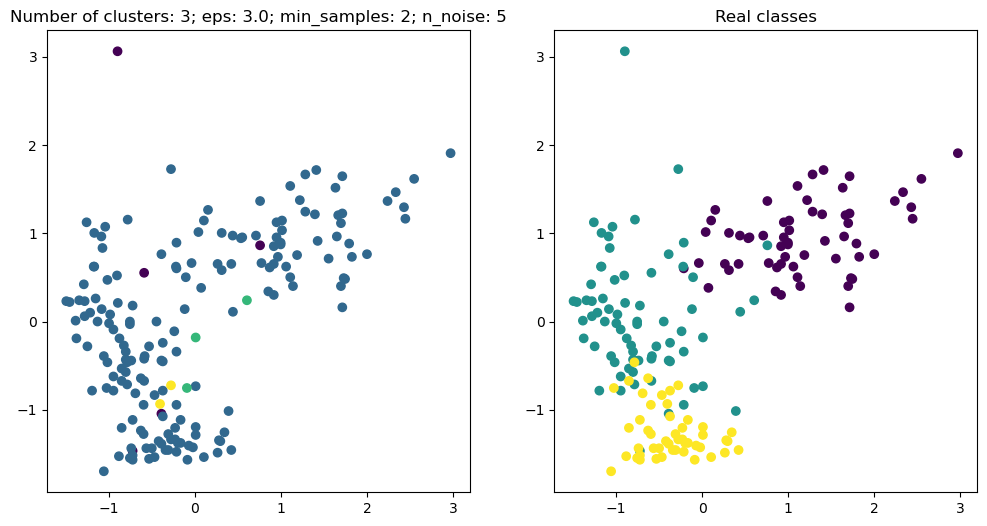

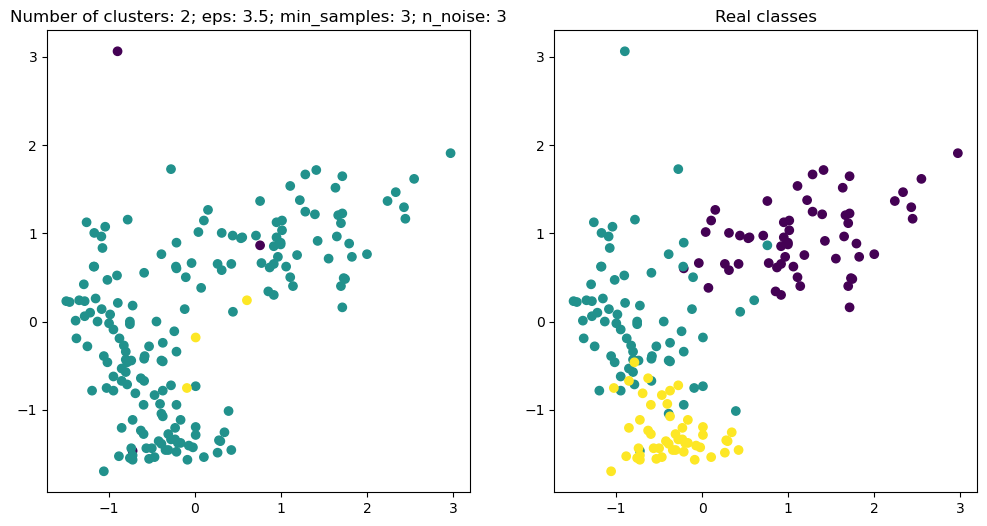

In [26]:
info = []


applyDBSCAN(X_std, eps=1.2, min_samples=2)

applyDBSCAN(X_std, eps=1.9, min_samples=3)


applyDBSCAN(X_std, eps=2.5, min_samples=2)

applyDBSCAN(X_std, eps=2.8, min_samples=3)
applyDBSCAN(X_std, eps=3.0, min_samples=2)
applyDBSCAN(X_std, eps=3.5, min_samples=3)



data = pd.DataFrame(info, columns=['eps', 'min_samples', 'n_clusters_', 'n_noise_', 'clusters', 'core samples'])
data

eps  min_samples  n_clusters_  n_noise_  \
0  0.5            2            4        18   
1  0.5            3            2        22   
2  0.5            4            2        23   
3  0.4            2            5        52   
4  0.3            3            7       148   

                                            clusters  core samples  
0                {0: 105, -1: 18, 1: 51, 2: 2, 3: 2}           160  
1                            {0: 105, -1: 22, 1: 51}           145  
2                            {0: 104, -1: 23, 1: 51}           134  
3           {0: 83, -1: 52, 1: 3, 2: 2, 3: 36, 4: 2}           126  
4  {1: 7, -1: 148, 2: 6, 0: 4, 3: 4, 4: 3, 5: 3, ...            17

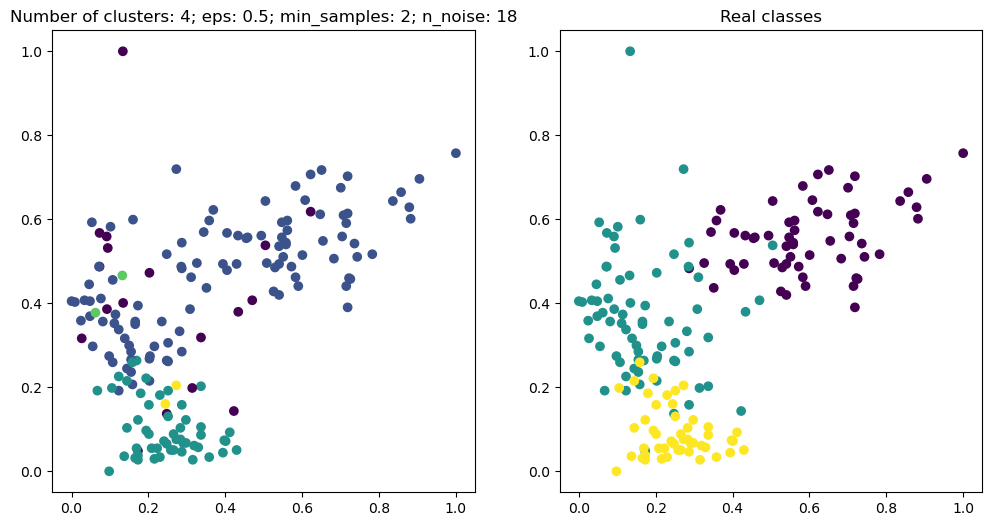

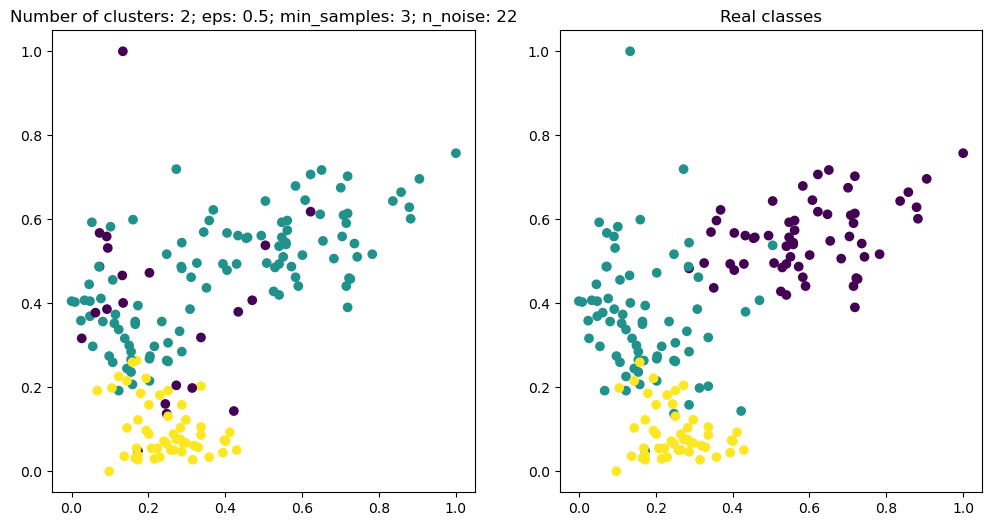

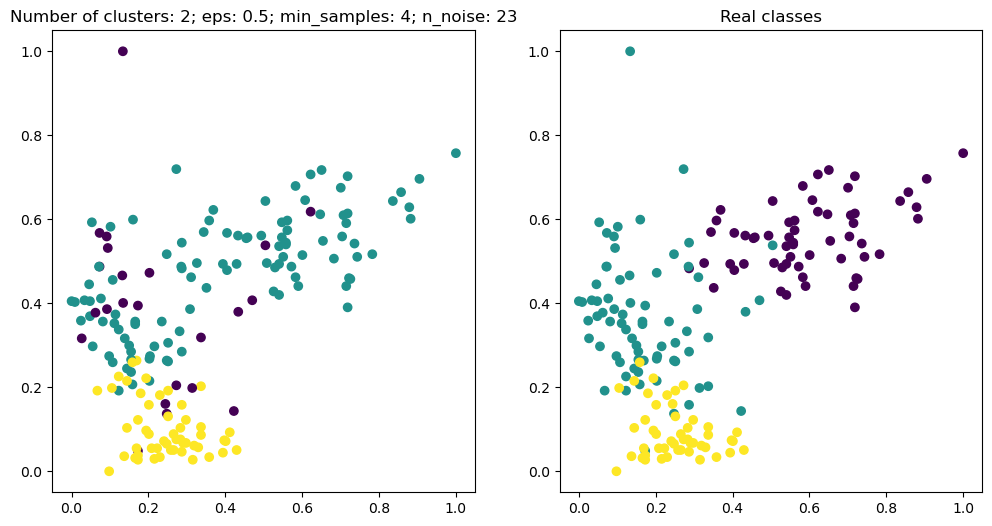

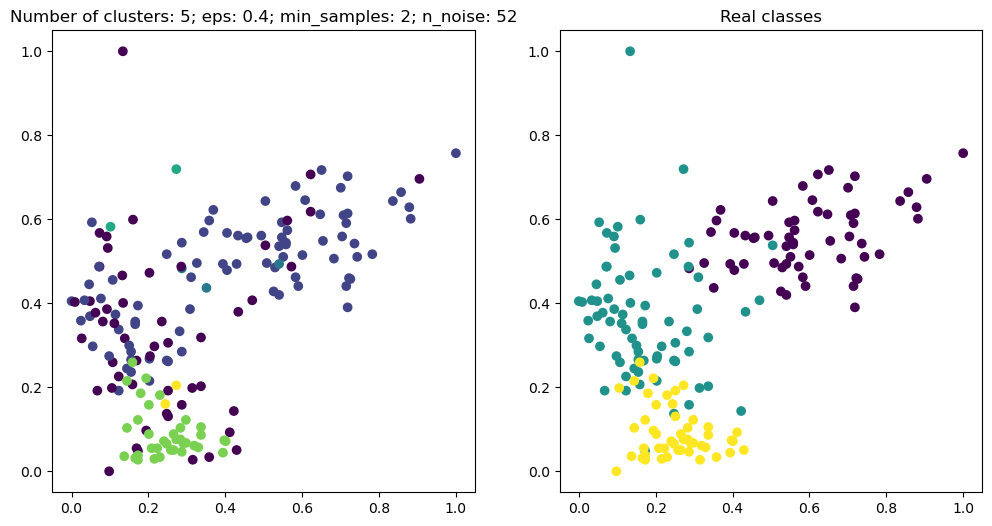

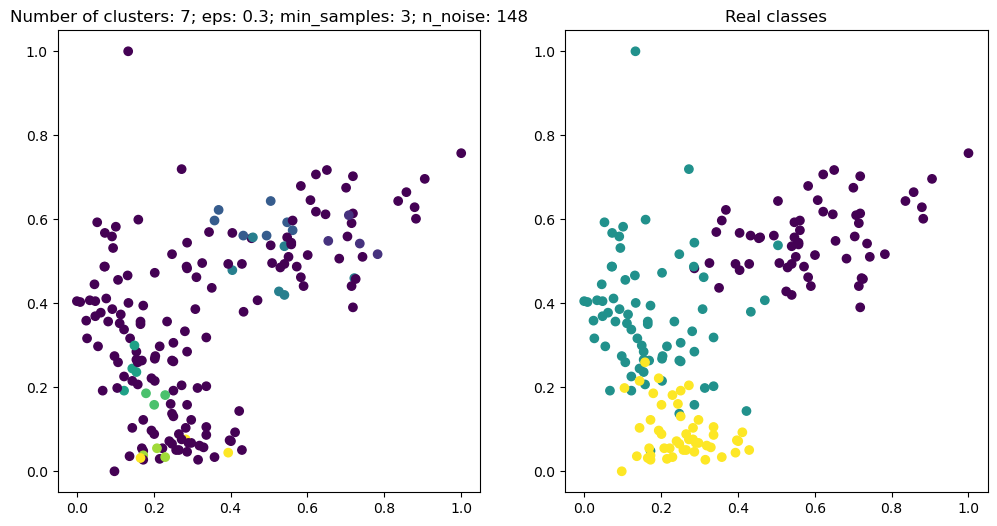

In [27]:
info = []

applyDBSCAN(X_mm, eps=0.5, min_samples=2)
applyDBSCAN(X_mm, eps=0.5, min_samples=3)
applyDBSCAN(X_mm, eps=0.5, min_samples=4)
applyDBSCAN(X_mm, eps=0.4, min_samples=2)
applyDBSCAN(X_mm, eps=0.3, min_samples=3)

data = pd.DataFrame(info, columns=['eps', 'min_samples', 'n_clusters_', 'n_noise_', 'clusters', 'core samples'])
data

# Hierarchical clustering

In [28]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

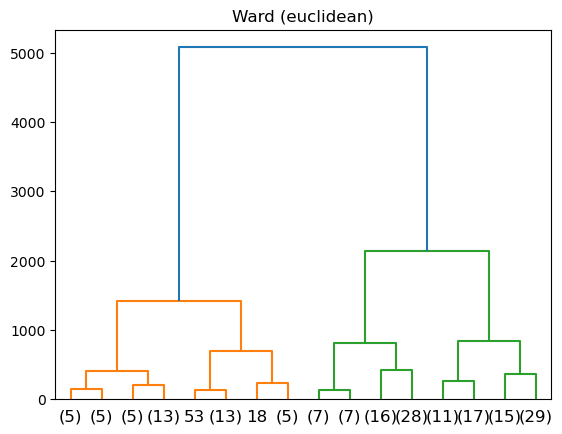

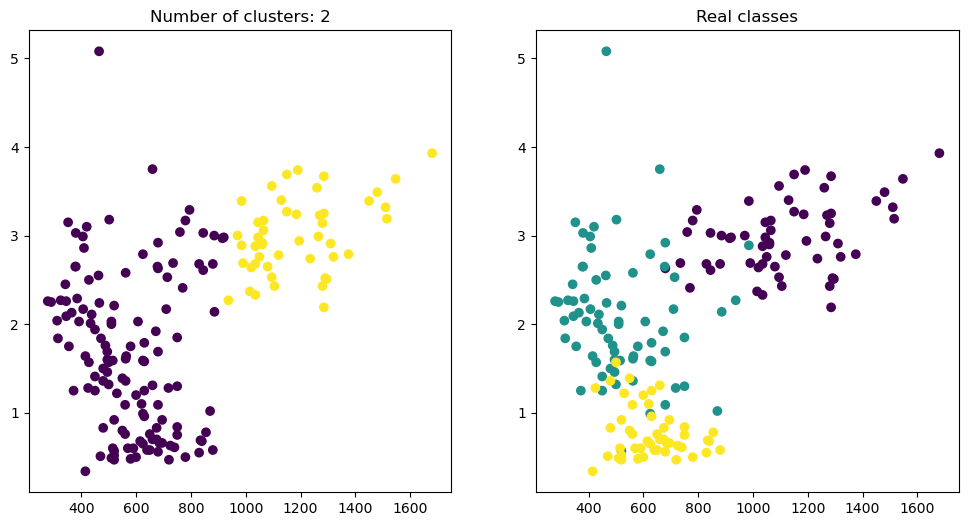

In [29]:
n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='ward', distance_threshold=None, compute_distances=True)
model = model.fit(X)
plt.title("Ward (euclidean)")
plot_dendrogram(model, truncate_mode="level", p=3, color_threshold=3000)
plt.show()



title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
calcMetrics(n_clusters, model.labels_)

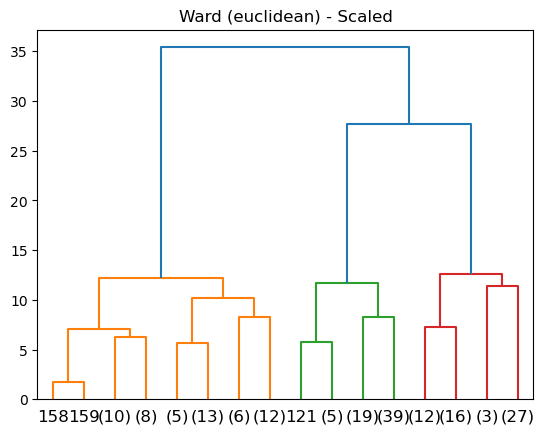

n_clusters: 3
entropy new labels: 0.1861442449472491
accuracy: 0.9269662921348315
---------------------------


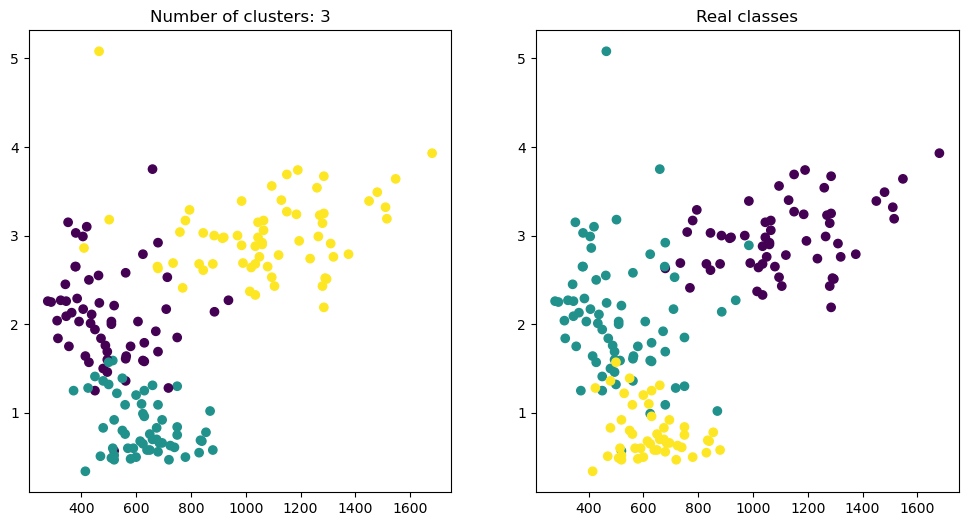

In [30]:
n_clusters = 3

model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='ward', distance_threshold=None, compute_distances=True)
model = model.fit(X_std)
plt.title("Ward (euclidean) - Scaled")
plot_dendrogram(model, truncate_mode="level", p=3, color_threshold=14)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
calcMetrics(n_clusters, model.labels_)

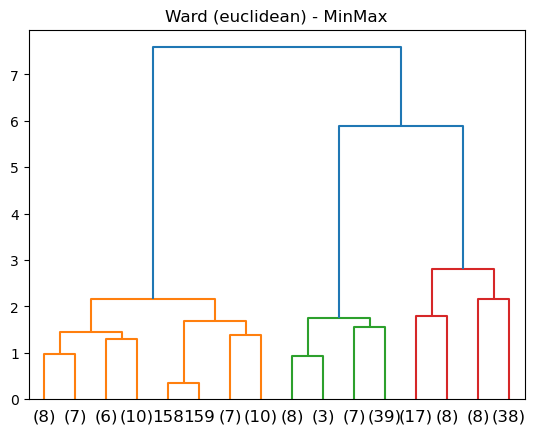

n_clusters: 3
entropy new labels: 0.06805960367483563
accuracy: 0.9775280898876404
---------------------------


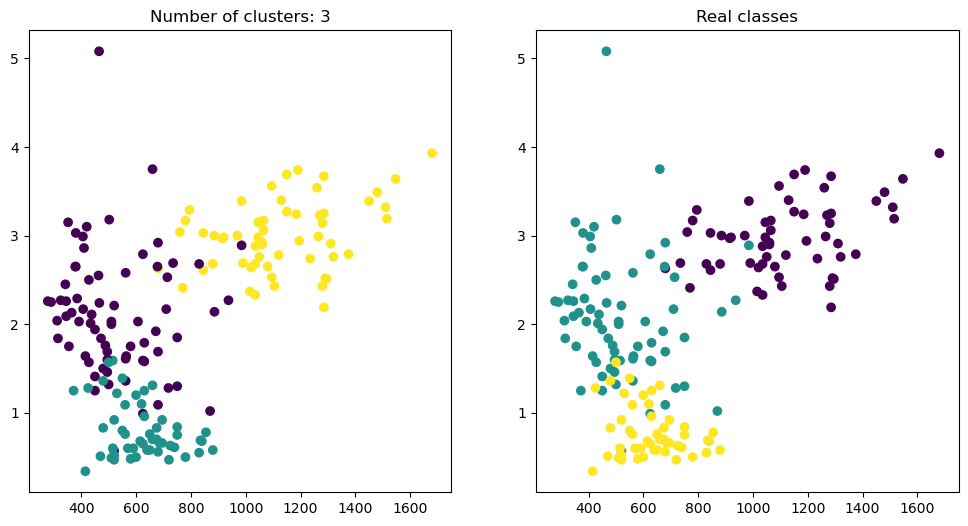

In [31]:
n_clusters = 3

model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='ward', distance_threshold=None, compute_distances=True)
model = model.fit(X_mm)
plt.title("Ward (euclidean) - MinMax")
plot_dendrogram(model, truncate_mode="level", p=3, color_threshold=4)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
calcMetrics(n_clusters, model.labels_)

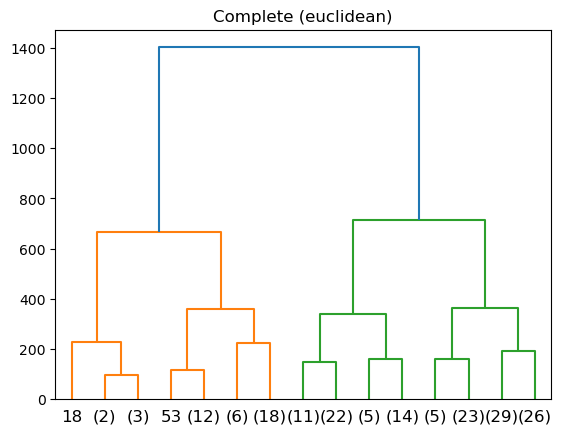

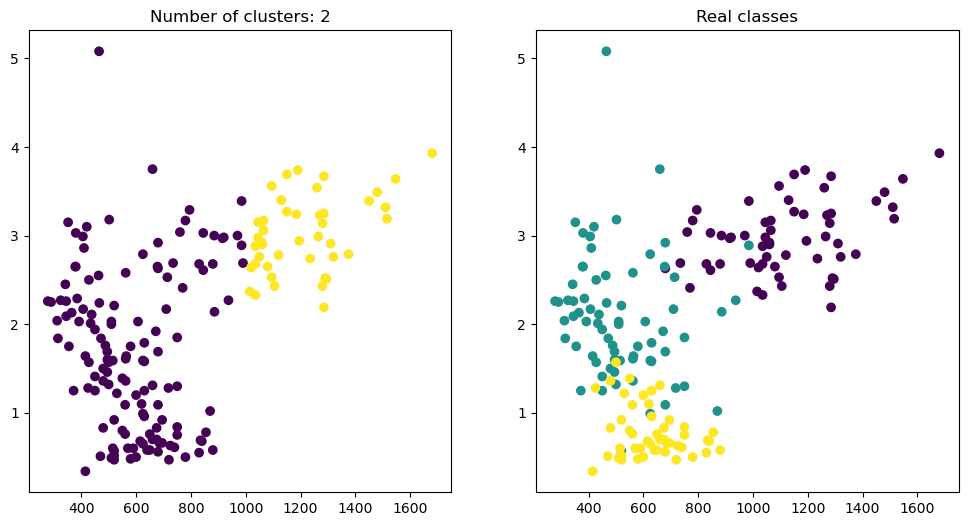

In [32]:
n_clusters = 2

model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='complete', distance_threshold=None, compute_distances=True)
model = model.fit(X)
plt.title("Complete (euclidean)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
calcMetrics(n_clusters, model.labels_)

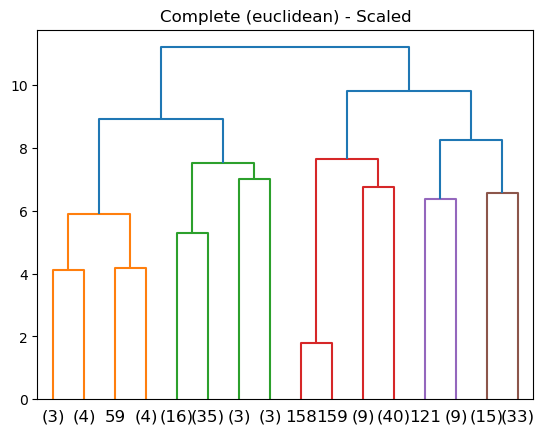

In [33]:
n_clusters = 3

model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='complete', distance_threshold=None, compute_distances=True)
model = model.fit(X_std)
plt.title("Complete (euclidean) - Scaled")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
#plotClusters(X, model.labels_, title)
#calcMetrics(n_clusters, model.labels_)

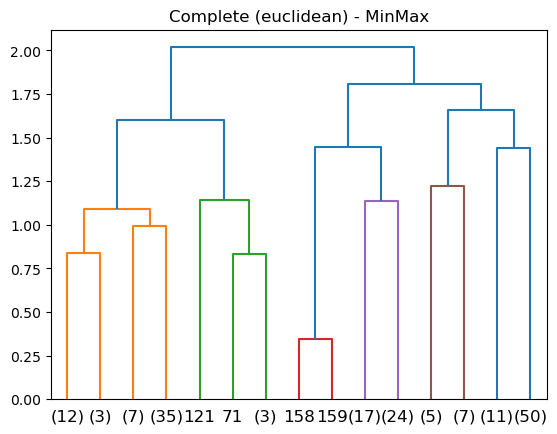

In [34]:
n_clusters = 3

model = AgglomerativeClustering(n_clusters=1, compute_full_tree=True, metric='euclidean', linkage='complete', distance_threshold=None, compute_distances=True)
model = model.fit(X_mm)
plt.title("Complete (euclidean) - MinMax")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
#plotClusters(X, model.labels_, title)
#calcMetrics(n_clusters, model.labels_)

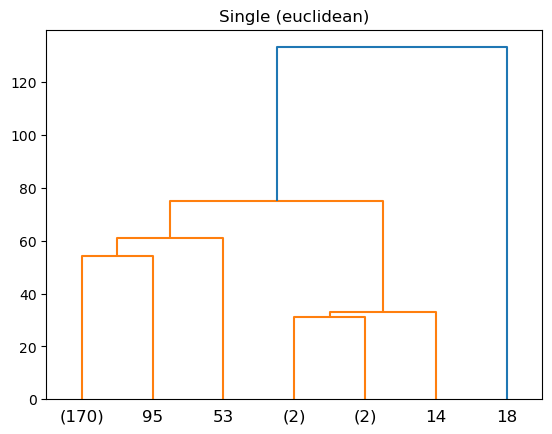

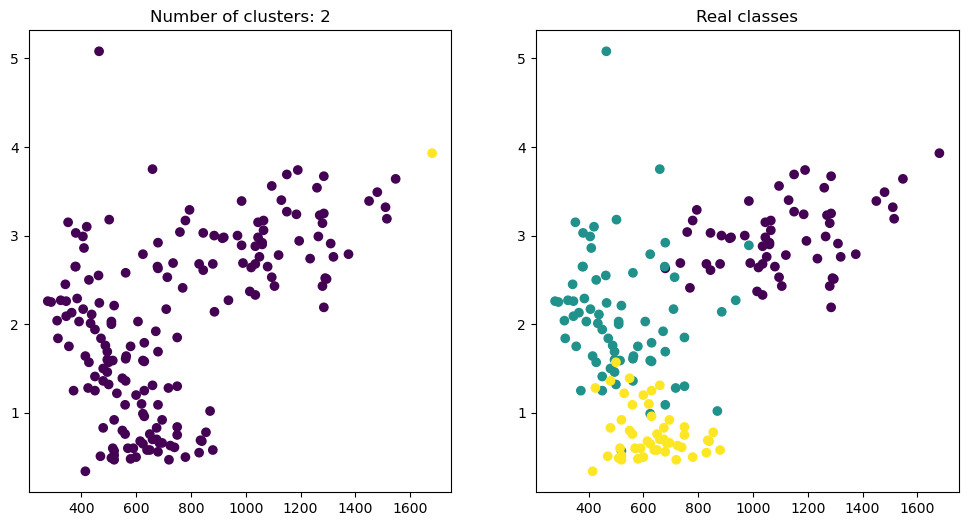

In [35]:
n_clusters = 2

model = AgglomerativeClustering(n_clusters=n_clusters, compute_full_tree=True, metric='euclidean', linkage='single', distance_threshold=None, compute_distances=True)
model = model.fit(X)
plt.title("Single (euclidean)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
#calcMetrics(n_clusters, model.labels_)

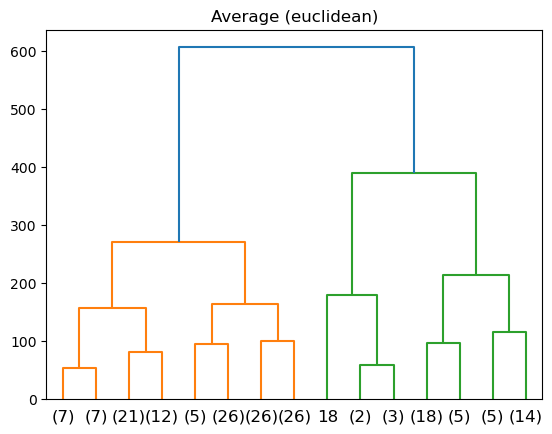

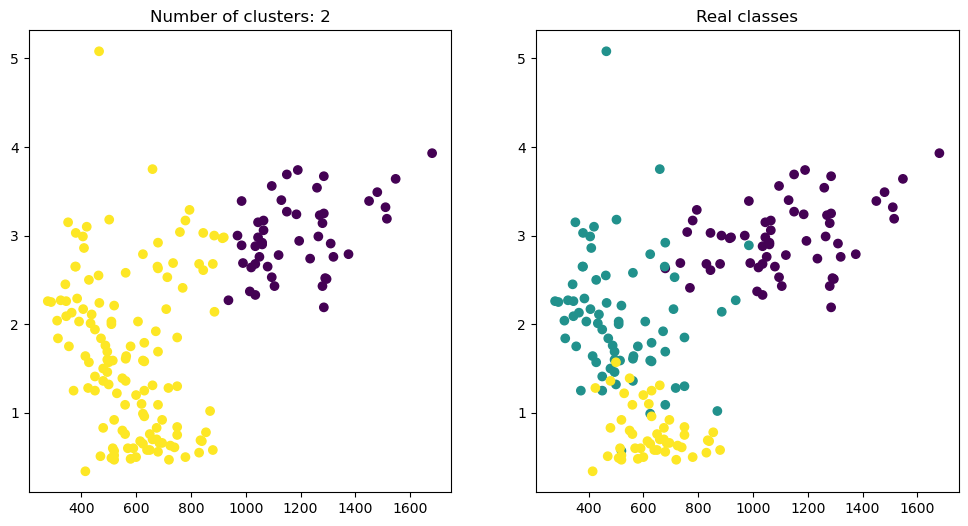

In [36]:
n_clusters = 2

model = AgglomerativeClustering(n_clusters=2, compute_full_tree=True, metric='euclidean', linkage='average', distance_threshold=None, compute_distances=True)
model = model.fit(X)
plt.title("Average (euclidean)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

title = 'Number of clusters: ' + str(n_clusters)
plotClusters(X, model.labels_, title)
#calcMetrics(n_clusters, model.labels_)